In [1]:
### Libraries ###

import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

# Loading data

In [2]:
combined_state_data = pd.read_csv("/Users/ujwal/Documents/Project2/Data/State_Combined_Df.csv", header=0)

In [10]:
combined_state_data = combined_state_data.drop(['Unnamed: 0'], axis=1)

In [11]:
combined_state_data.shape

(390865, 21)

#### Converting Amorterm in years to calculate PMT

In [4]:
for i in combined_state_data.index:
    combined_state_data.at[i,'AmorTerm'] = combined_state_data.at[i,'AmorTerm'] /12

In [6]:
# Taking first row to find pmt for a single application

np.round(abs(np.pmt(rate=combined_state_data.at[0,'Rate'], fv=0, nper=combined_state_data.at[0,'AmorTerm'], pv=combined_state_data.at[0,'Amount'])), 2)

6228.09

In [7]:
# Creating a PMT column
combined_state_data['PMT'] = "Nan"

In [8]:
#Applyting pmt function to the entire dataFrame

for i in combined_state_data.index:
    combined_state_data.at[i,'PMT'] = np.round(abs(np.pmt(rate=combined_state_data.at[i,'Rate'], fv=0, nper=combined_state_data.at[i,'AmorTerm'], pv=combined_state_data.at[i,'Amount'])), 2)

# Finding co-relations on the combined /filtered data

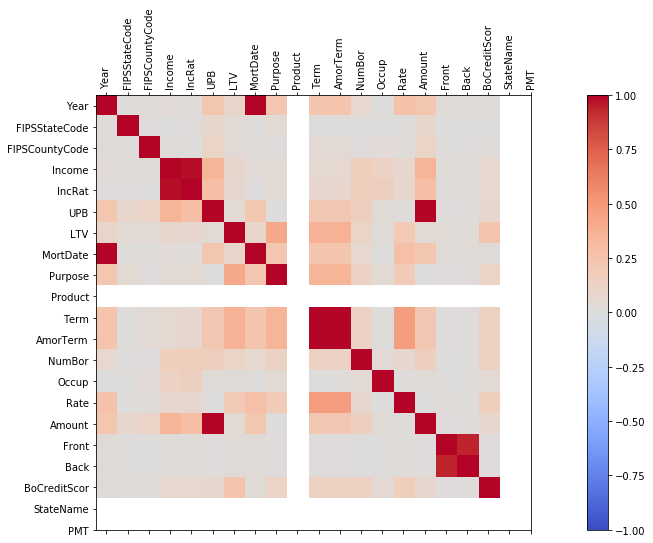

In [12]:
## Corelation between selected variables- 2015 data

corr = combined_state_data.corr().abs()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
fig.set_size_inches(20,8)
ticks = np.arange(0,len(combined_state_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(combined_state_data.columns)
ax.set_yticklabels(combined_state_data.columns)
plt.show()

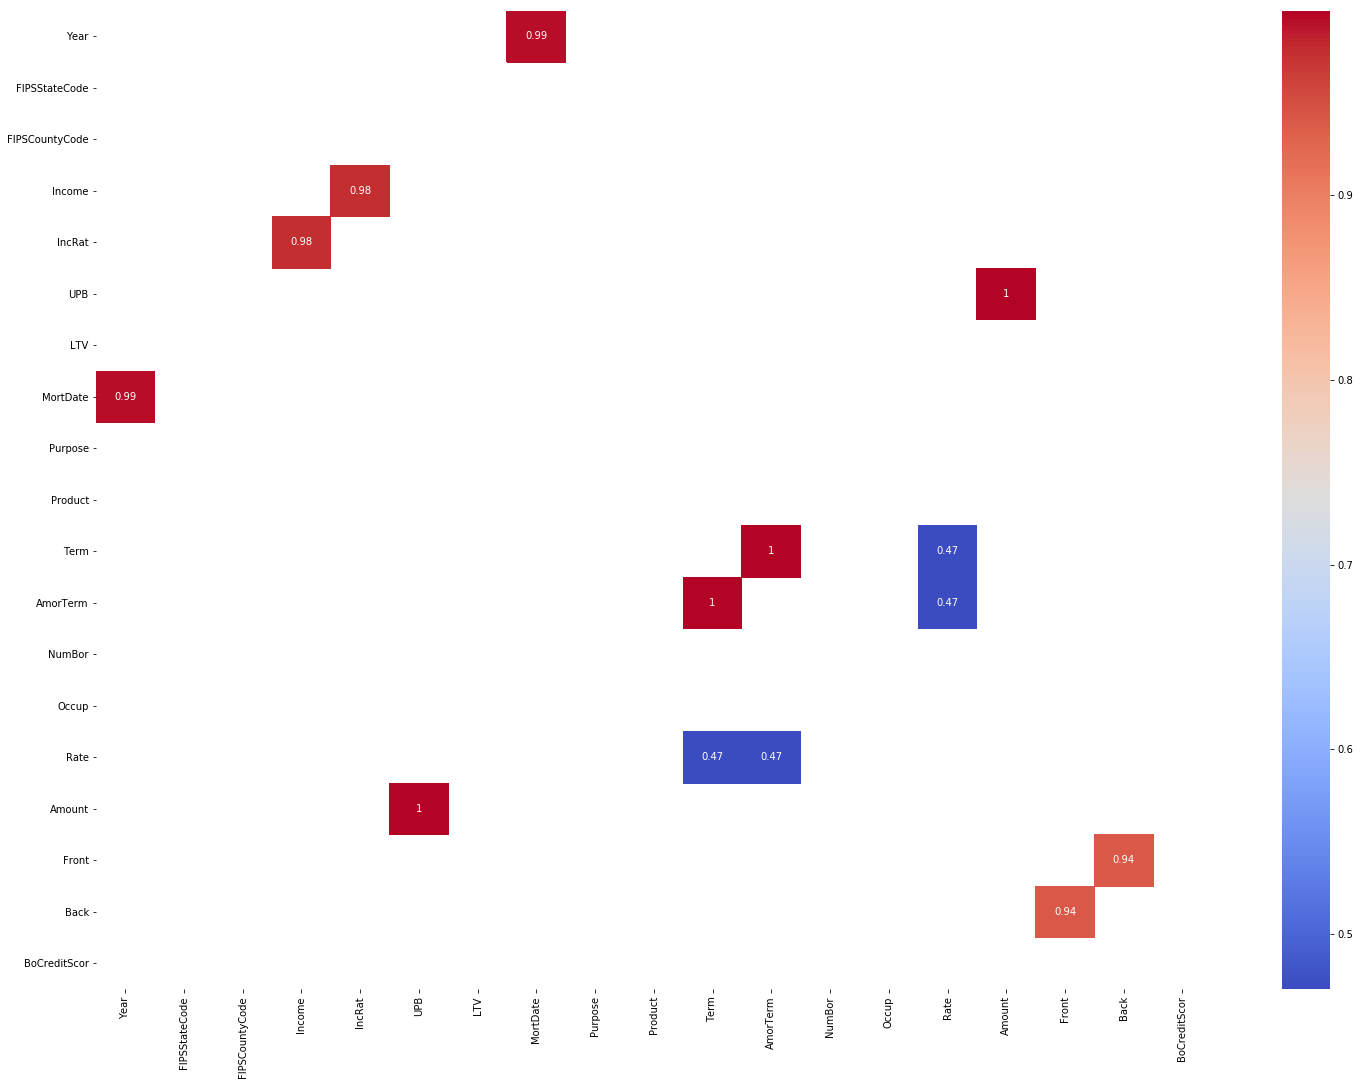

In [13]:
# Plotting variables where correlations are maximum

corr = combined_state_data.corr()
corr2 = corr[(corr >0.4) & (corr !=1)]
#corr3 = corr2.dropna(thresh=1)
from matplotlib import pyplot
pyplot.figure(figsize=(25, 18))
sns.heatmap(corr2, cbar = True,   annot=True,  cmap= 'coolwarm')

In [14]:
## Variables with maximum corelation

max_corr_vars = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(max_corr_vars)

Term            AmorTerm        0.999961
UPB             Amount          0.999808
Year            MortDate        0.994804
Income          IncRat          0.979218
Front           Back            0.941586
Term            Rate            0.470174
AmorTerm        Rate            0.470130
LTV             AmorTerm        0.371328
                Term            0.371189
Income          Amount          0.350492
                UPB             0.350384
IncRat          Amount          0.284438
                UPB             0.284367
Year            AmorTerm        0.242410
                Term            0.242282
MortDate        AmorTerm        0.241310
                Term            0.241180
Year            Amount          0.231811
                UPB             0.231458
UPB             MortDate        0.229651
MortDate        Amount          0.229615
UPB             Term            0.219731
                AmorTerm        0.219668
Term            Amount          0.219200
AmorTerm        

# Correlations:
##### Lets start with income amount and rate:

In [15]:
amount_rate_income = combined_state_data[["Amount", "Rate", "Income" ]]

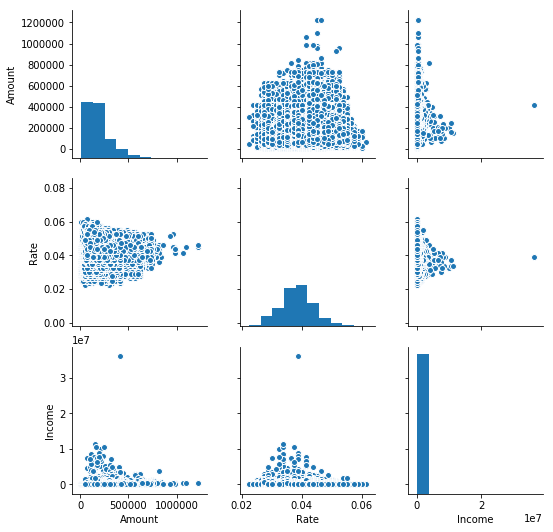

In [16]:
sns.pairplot(amount_rate_income.dropna())

In [17]:
amount_DTI_Income = combined_state_data[['Amount', 'IncRat', 'Income']]

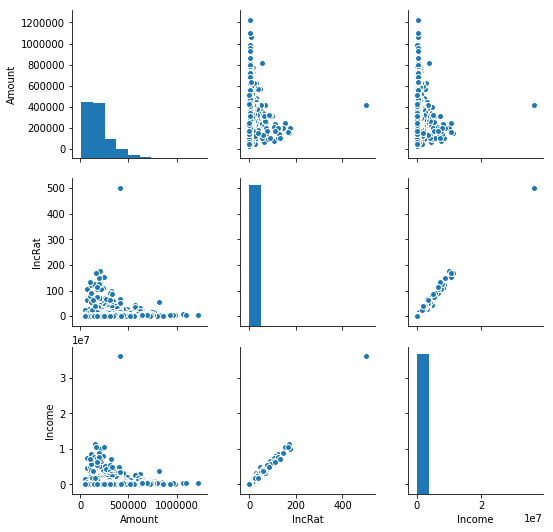

In [18]:
sns.pairplot(amount_DTI_Income.dropna())

In [19]:
pmt_rate_amount = combined_state_data[['PMT','Rate','Amount']]

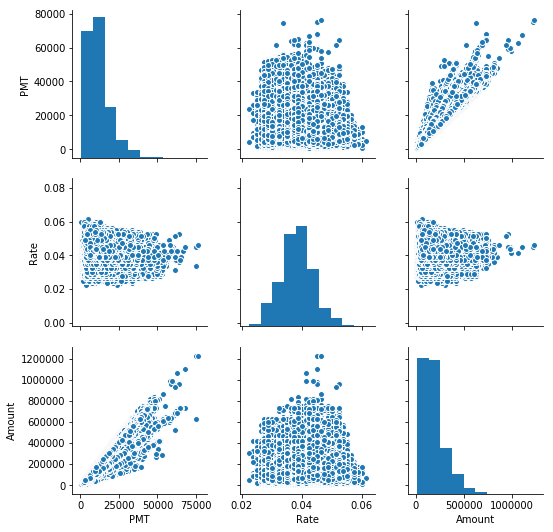

In [20]:
sns.pairplot(pmt_rate_amount.dropna())

In [21]:
creds_rate_amount = combined_state_data[['BoCreditScor','Rate','Amount']]

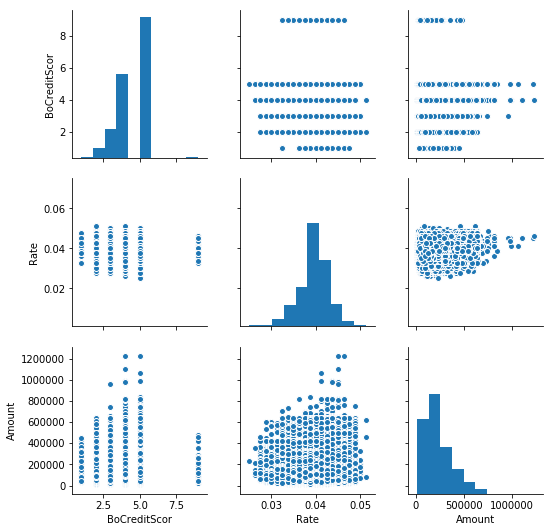

In [32]:
sns.pairplot(creds_rate_amount.dropna())

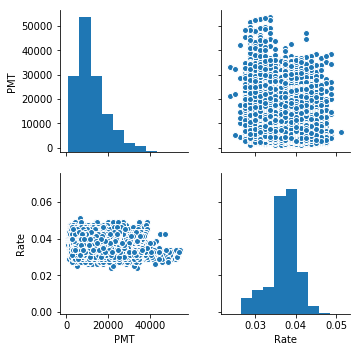

In [34]:
pmt_rate = filtered_col_df[['PMT','Rate']]
sns.pairplot(pmt_rate.dropna())

##### No strong correlations found here, need to to analyze it at indivisual level

#### Lets Consider FICO

In [22]:
#2017 data

print("Average Interest Rate: ")
c1 = combined_state_data[combined_state_data["BoCreditScor"] ==1].describe()["Rate"]['mean']
c2 = combined_state_data[combined_state_data["BoCreditScor"] ==2].describe()["Rate"]['mean']
c3 = combined_state_data[combined_state_data["BoCreditScor"] ==3].describe()["Rate"]['mean']
c4 = combined_state_data[combined_state_data["BoCreditScor"] ==4].describe()["Rate"]['mean']
c5 = combined_state_data[combined_state_data["BoCreditScor"] ==5].describe()["Rate"]['mean']


print("1) CREDIT SCORE = <620 \nAverage interest rate =",c1,"\n\n2)CREDIT SCORE = 620 to < 660\nAverage interest rate =",c2," \n\n3) CREDIT SCORE = 660 < 700\nAverage interest rate = ",c3," \n\n4) CREDIT SCORE =700 < 760\nAverage interest rate = ",c4," \n\n5) CREDIT SCORE = 760\nAverage interest rate = ",c5)
print("\n\n\nPrime Interest Rates in 2017:\n12/14/2017 4.50%\n06/15/2017 4.25%\n03/16/2017 4.00%\n\n*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm ")
print("\n\nGood the score, less the interest rate")

Average Interest Rate: 
1) CREDIT SCORE = <620 
Average interest rate = 0.04352952448545058 

2)CREDIT SCORE = 620 to < 660
Average interest rate = 0.0410651637360897  

3) CREDIT SCORE = 660 < 700
Average interest rate =  0.04005151212637353  

4) CREDIT SCORE =700 < 760
Average interest rate =  0.03901581576078299  

5) CREDIT SCORE = 760
Average interest rate =  0.037913768942271636



Prime Interest Rates in 2017:
12/14/2017 4.50%
06/15/2017 4.25%
03/16/2017 4.00%

*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm 


Good the score, less the interest rate


In [23]:
#2017 data

c1 = combined_state_data[combined_state_data["BoCreditScor"] == 1].describe()["LTV"]['mean']
c2 = combined_state_data[combined_state_data["BoCreditScor"] == 2].describe()["LTV"]['mean']
c3 = combined_state_data[combined_state_data["BoCreditScor"] == 3].describe()["LTV"]['mean']
c4 = combined_state_data[combined_state_data["BoCreditScor"] == 4].describe()["LTV"]['mean']
c5 = combined_state_data[combined_state_data["BoCreditScor"] == 5].describe()["LTV"]['mean']

print("1 = <620 \nAverage LTV =",c1,"\n\n2 = 620 to < 660\nAverage LTV =",c2," \n\n3 = 660 < 700\nAverage LTV = ",c3," \n\n4 =700 < 760\nAverage LTV = ",c4," \n\n5 = 760\nAverage LTV = ",c5)
print("\nHere people with more Credit score got higher amount of Loan\n\n\n")

1 = <620 
Average LTV = 0.9230115684882884 

2 = 620 to < 660
Average LTV = 0.86488806259075  

3 = 660 < 700
Average LTV =  0.809711812202657  

4 =700 < 760
Average LTV =  0.770908423447231  

5 = 760
Average LTV =  0.7049077268425683

Here people with more Credit score got higher amount of Loan





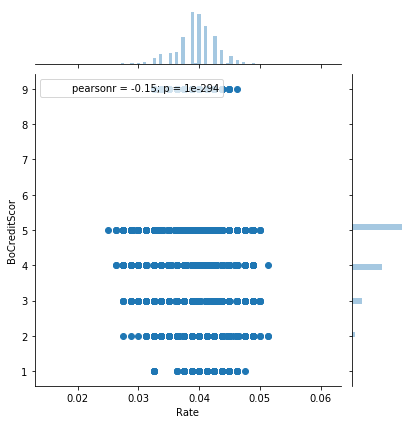

In [37]:
sns.jointplot('Rate','BoCreditScor',data,kind='scatter')

#### Lets try State wise interest rate

In [38]:
data_with_states = data.merge(state_df, how='left')
data_with_states =data_with_states.rename(columns = {"Name": "Property_State"})
data_with_states.head()

,Year,Assigned ID,Bank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,...,Corace4,Corace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO,Property_State,Postal Code
0,2017,2092102,Atlanta,72,15,25020,1609553,2802.02,99.15,15863,...,6,6,2,1,2,2,1,2,Puerto Rico,PR
1,2017,2092103,Atlanta,66,10,99999,9999999999,9540.00,92.90,75804,...,6,6,2,1,2,2,1,2,Guam,GU
2,2017,2092104,Atlanta,66,10,99999,1389637,9563.00,92.90,49250,...,6,6,2,1,2,2,1,2,Guam,GU
3,2017,2092105,Atlanta,48,439,19100,1337443,1141.03,25.31,102791,...,6,6,2,1,2,2,1,2,Texas,TX
4,2017,2092106,Atlanta,6,99,33700,277574,32.02,71.74,58235,...,6,6,2,1,2,2,1,2,California,CA


In [39]:
#2017 data

states = set(data_with_states["Property_State"])
clean_states = list(states)
clean_states.remove(clean_states[0])

In [40]:
rate_state={}
for bank in clean_states:
    rate = data_with_states[data_with_states["Property_State"] =="{0}".format(bank)].describe()["Rate"]['mean']
    rate_state[bank] = rate

In [41]:
rate_state_df = pd.DataFrame(list(rate_state.items()), columns=["State","Avg_Rate"])

In [42]:
#2017 data

rate_state_df

,State,Avg_Rate
0,Mississippi,0.039140
1,NaN,NaN
2,California,0.041248
3,Wyoming,0.039823
4,Michigan,0.039548
5,Guam,0.035560
6,Indiana,0.039305
7,Washington,0.040787
8,Idaho,0.040024
9,Florida,0.040654


#### Lets try State wise

In [24]:
#2017 data

for state in set(combined_state_data["StateName"]):
    print("Average Interest Rate in :",state)
    print(combined_state_data[combined_state_data["StateName"] =="{0}".format(state)].describe()["Rate"]['mean'],"\n")

Average Interest Rate in : nan
nan 

Average Interest Rate in : Tennessee
0.03742009321595013 

Average Interest Rate in : Louisiana
0.04108753709198821 

Average Interest Rate in : South Dakota
0.038303739982190235 

Average Interest Rate in : Mississippi
0.03825714285714287 

Average Interest Rate in : Michigan
0.037868601069866774 

Average Interest Rate in : Nebraska
0.03947165051245166 

Average Interest Rate in : Nevada
0.04006701388888886 

Average Interest Rate in : Oregon
0.039010212765957494 

Average Interest Rate in : Delaware
0.038955609756097534 

Average Interest Rate in : Pennsylvania
0.039602716829096184 

Average Interest Rate in : New York
0.03893659582231184 

Average Interest Rate in : Minnesota
0.038136251859199444 

Average Interest Rate in : Puerto Rico
0.035559999999999994 

Average Interest Rate in : Oklahoma
0.039465278414826874 

Average Interest Rate in : Texas
0.03966938971648227 

Average Interest Rate in : Alabama
0.03758015873015872 

Average Interest R

In [26]:
# Sampling the data for visualization 

sample_200 = combined_state_data.sample(200)

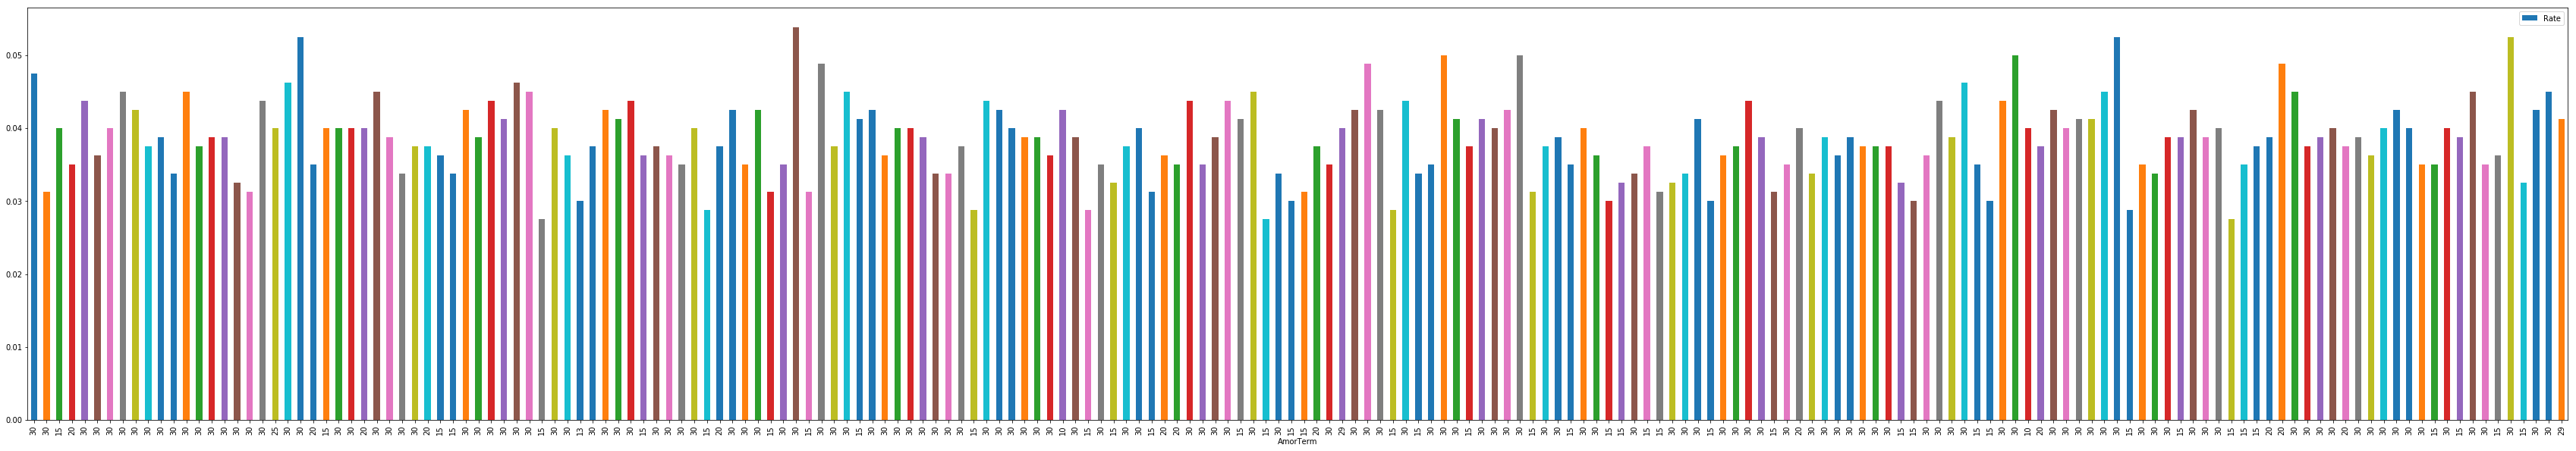

In [27]:
#Plotting AmorTerm and Rate ---> Corr value = 0.78

sample_200.plot(x="AmorTerm", y="Rate", kind = "bar", figsize=(60,10))

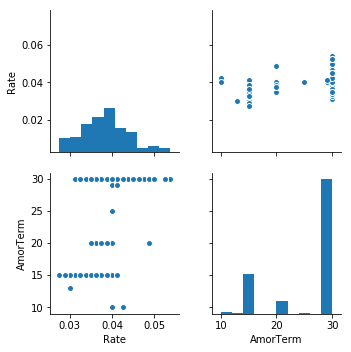

In [28]:
#Using a pairplot
sns.pairplot(sample_200[['Rate', 'AmorTerm']])

Seems, higher the AmorTerm, higher the rate. Taking mean rate for different 
AmorTerms 

In [29]:
sample_200['AmorTerm'].unique()

array([30, 15, 20, 25, 13, 10, 29])

In [30]:
print("Average Interest Rate: ")
c1 = combined_state_data[combined_state_data["AmorTerm"] ==15].describe()["Rate"]['mean']
c2 = combined_state_data[combined_state_data["AmorTerm"] ==30].describe()["Rate"]['mean']
c3 = combined_state_data[combined_state_data["AmorTerm"] ==20].describe()["Rate"]['mean']
c4 = combined_state_data[combined_state_data["AmorTerm"] ==29].describe()["Rate"]['mean']
c5 = combined_state_data[combined_state_data["AmorTerm"] ==27].describe()["Rate"]['mean']


print("1) AmorTerm = 15 \nAverage interest rate =",c1,"\n\n2)AmorTerm = 30\nAverage interest rate =",c2," \n\n3) AmorTerm = 20\nAverage interest rate = ",c3," \n\n4) AmorTerm =29\nAverage interest rate = ",c4," \n\n5) AmorTerm = 27\nAverage interest rate = ",c5)
print("\n\n\nPrime Interest Rates in 2017:\n12/14/2017 4.50%\n06/15/2017 4.25%\n03/16/2017 4.00%\n\n*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm ")
print("\n\n We can strongly conclude the above assumption")

Average Interest Rate: 
1) AmorTerm = 15 
Average interest rate = 0.03408215360330659 

2)AmorTerm = 30
Average interest rate = 0.04005286011881601  

3) AmorTerm = 20
Average interest rate =  0.03810058064516319  

4) AmorTerm =29
Average interest rate =  0.03950649819494564  

5) AmorTerm = 27
Average interest rate =  0.03884882697947214



Prime Interest Rates in 2017:
12/14/2017 4.50%
06/15/2017 4.25%
03/16/2017 4.00%

*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm 


 We can strongly conclude the above assumption


# Income Vs PMT

Looking at the pairplot, we can say the monthly payment is highly co-related to the total income of the borrower. 

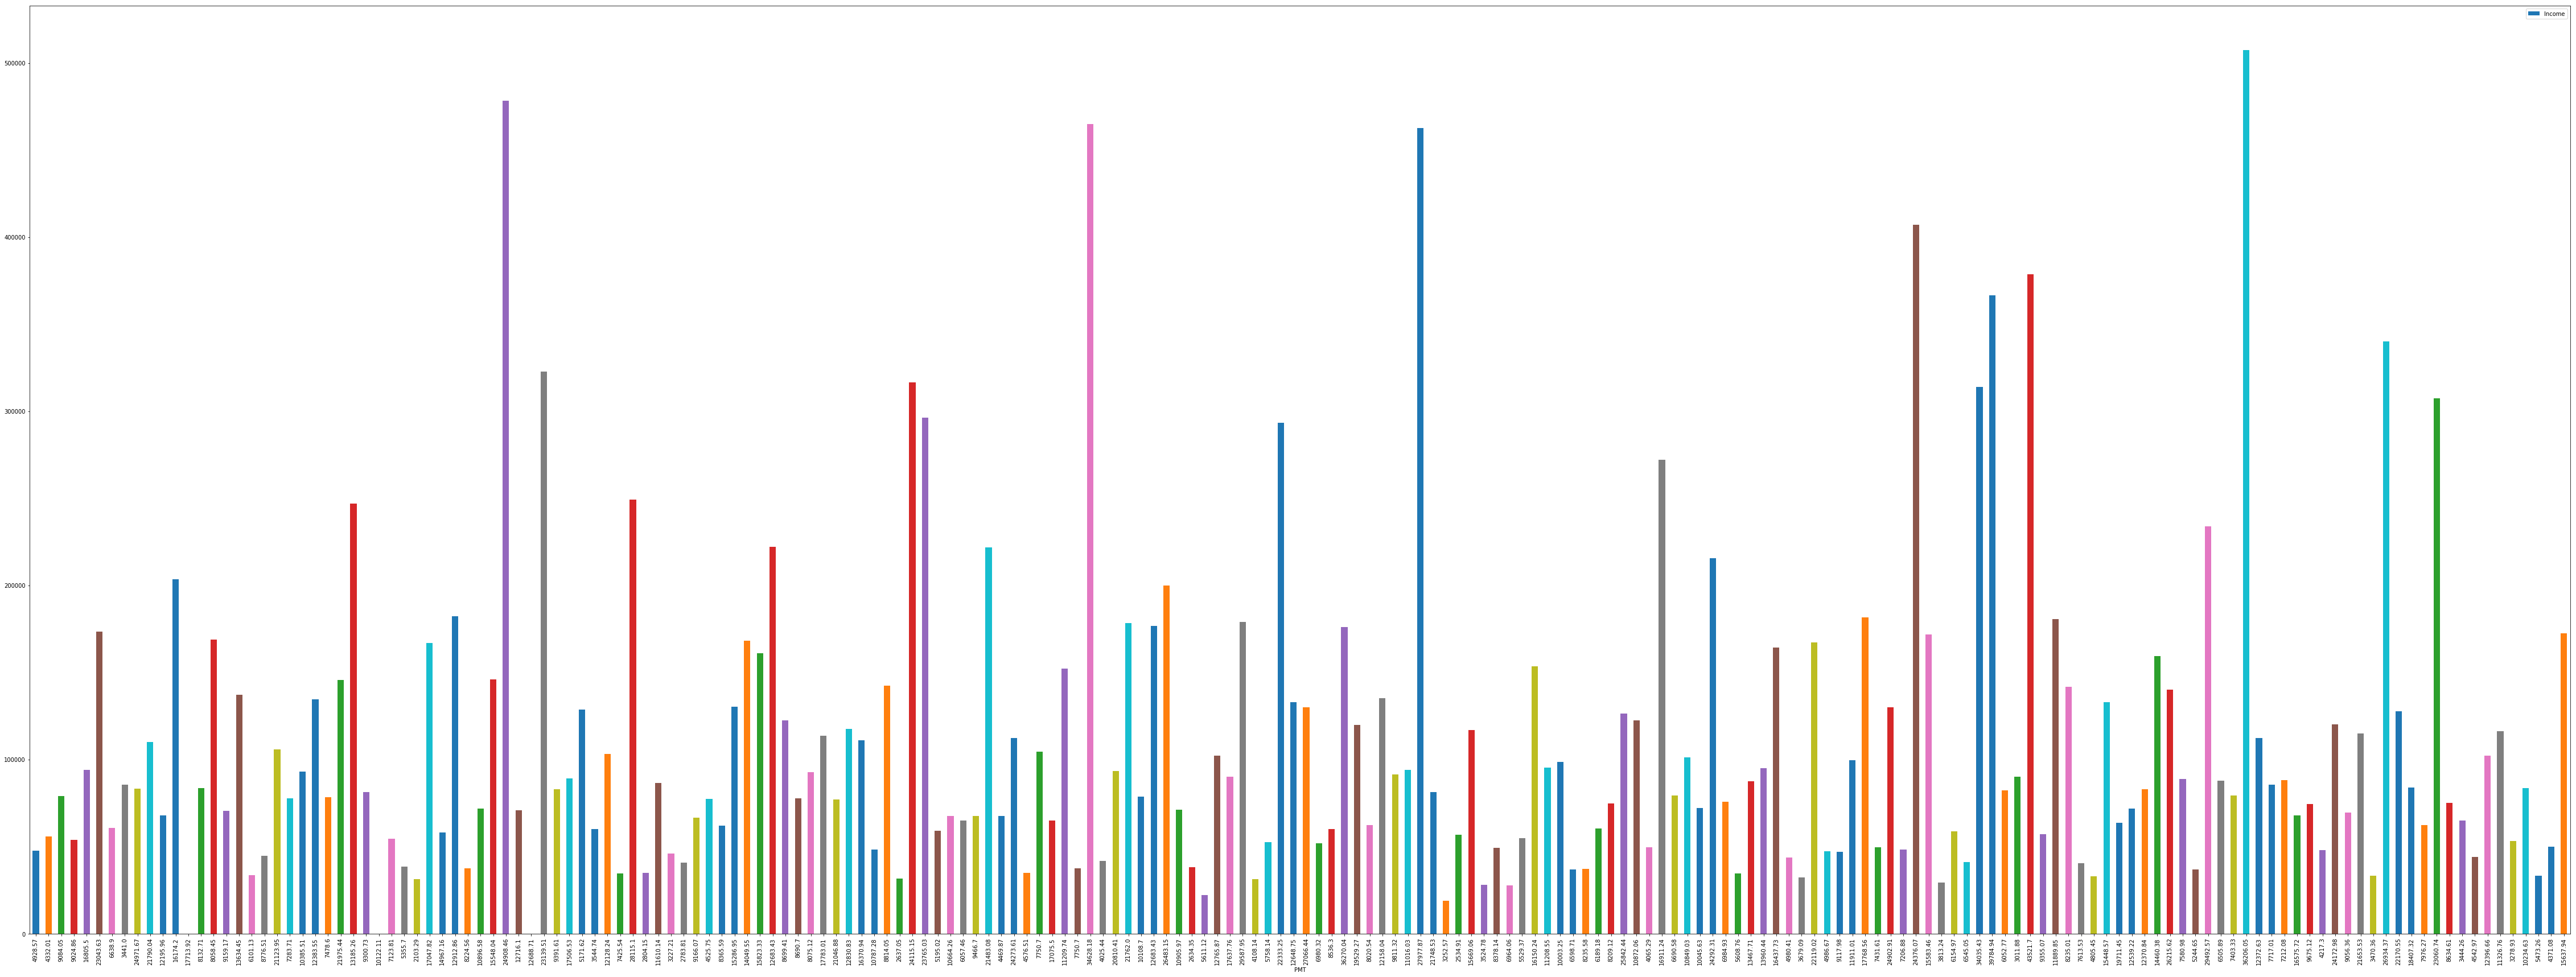

In [31]:
#Plotting PMT, Income and Rate ---> Corr value = 0.78

sample_200.plot(x="PMT", y='Income', kind = "bar", figsize=(80, 30))

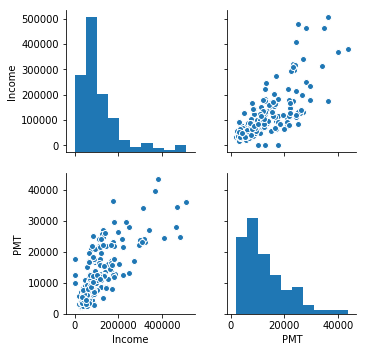

In [32]:
sns.pairplot(sample_200[['Income','PMT']])

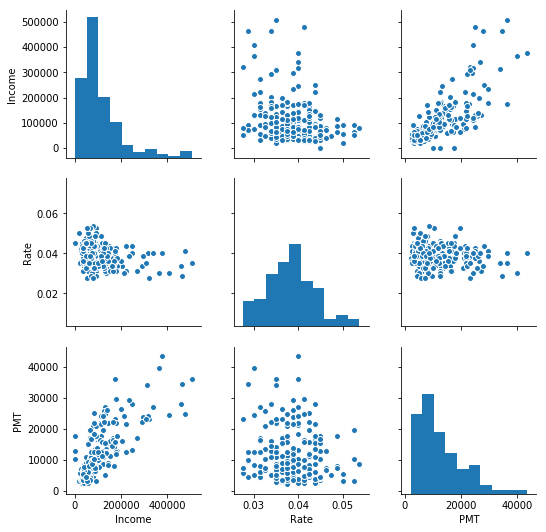

In [33]:
sns.pairplot(sample_200[['Income','Rate','PMT']])

# Let's track down how LTV affects the mortgage applications.

In [34]:
max_LTV_df = sample_200.sort_values('LTV', ascending=False)

In [36]:
min_LTV_df = combined_state_data.sort_values('LTV', ascending=True)

/Users/ujwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


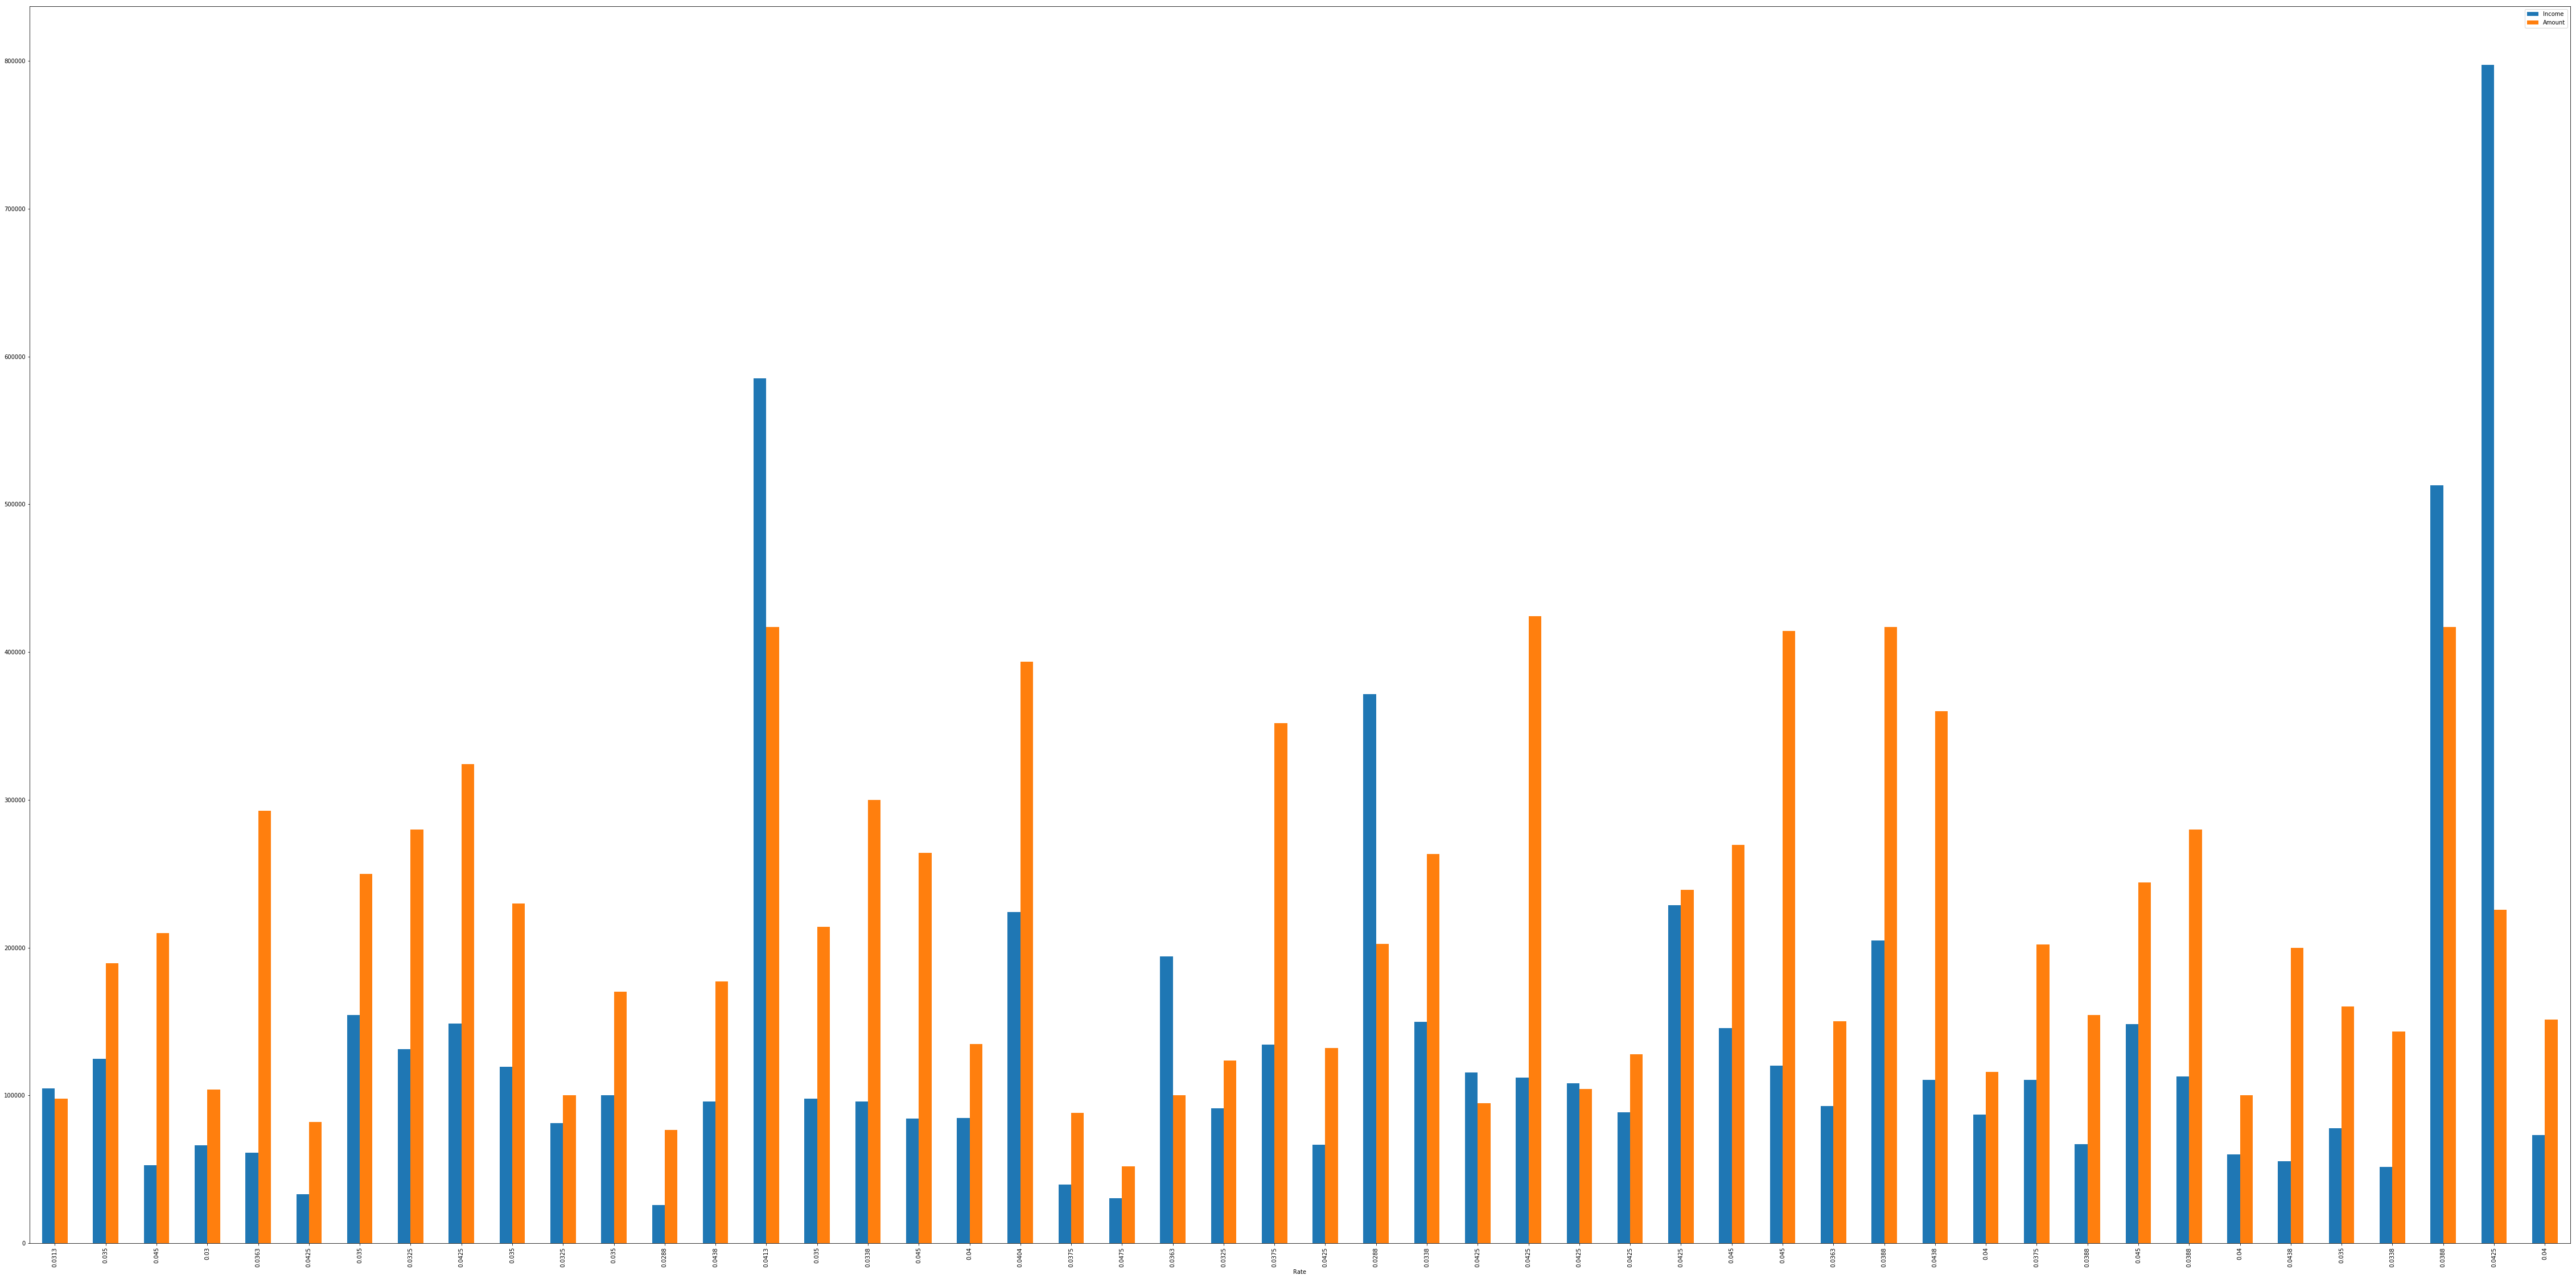

In [38]:
min_ltv_sample = min_LTV_df.sample(50)
min_ltv_sample.plot(x='Rate', y=['Income', 'Amount'], figsize=(80,40), kind = "bar")

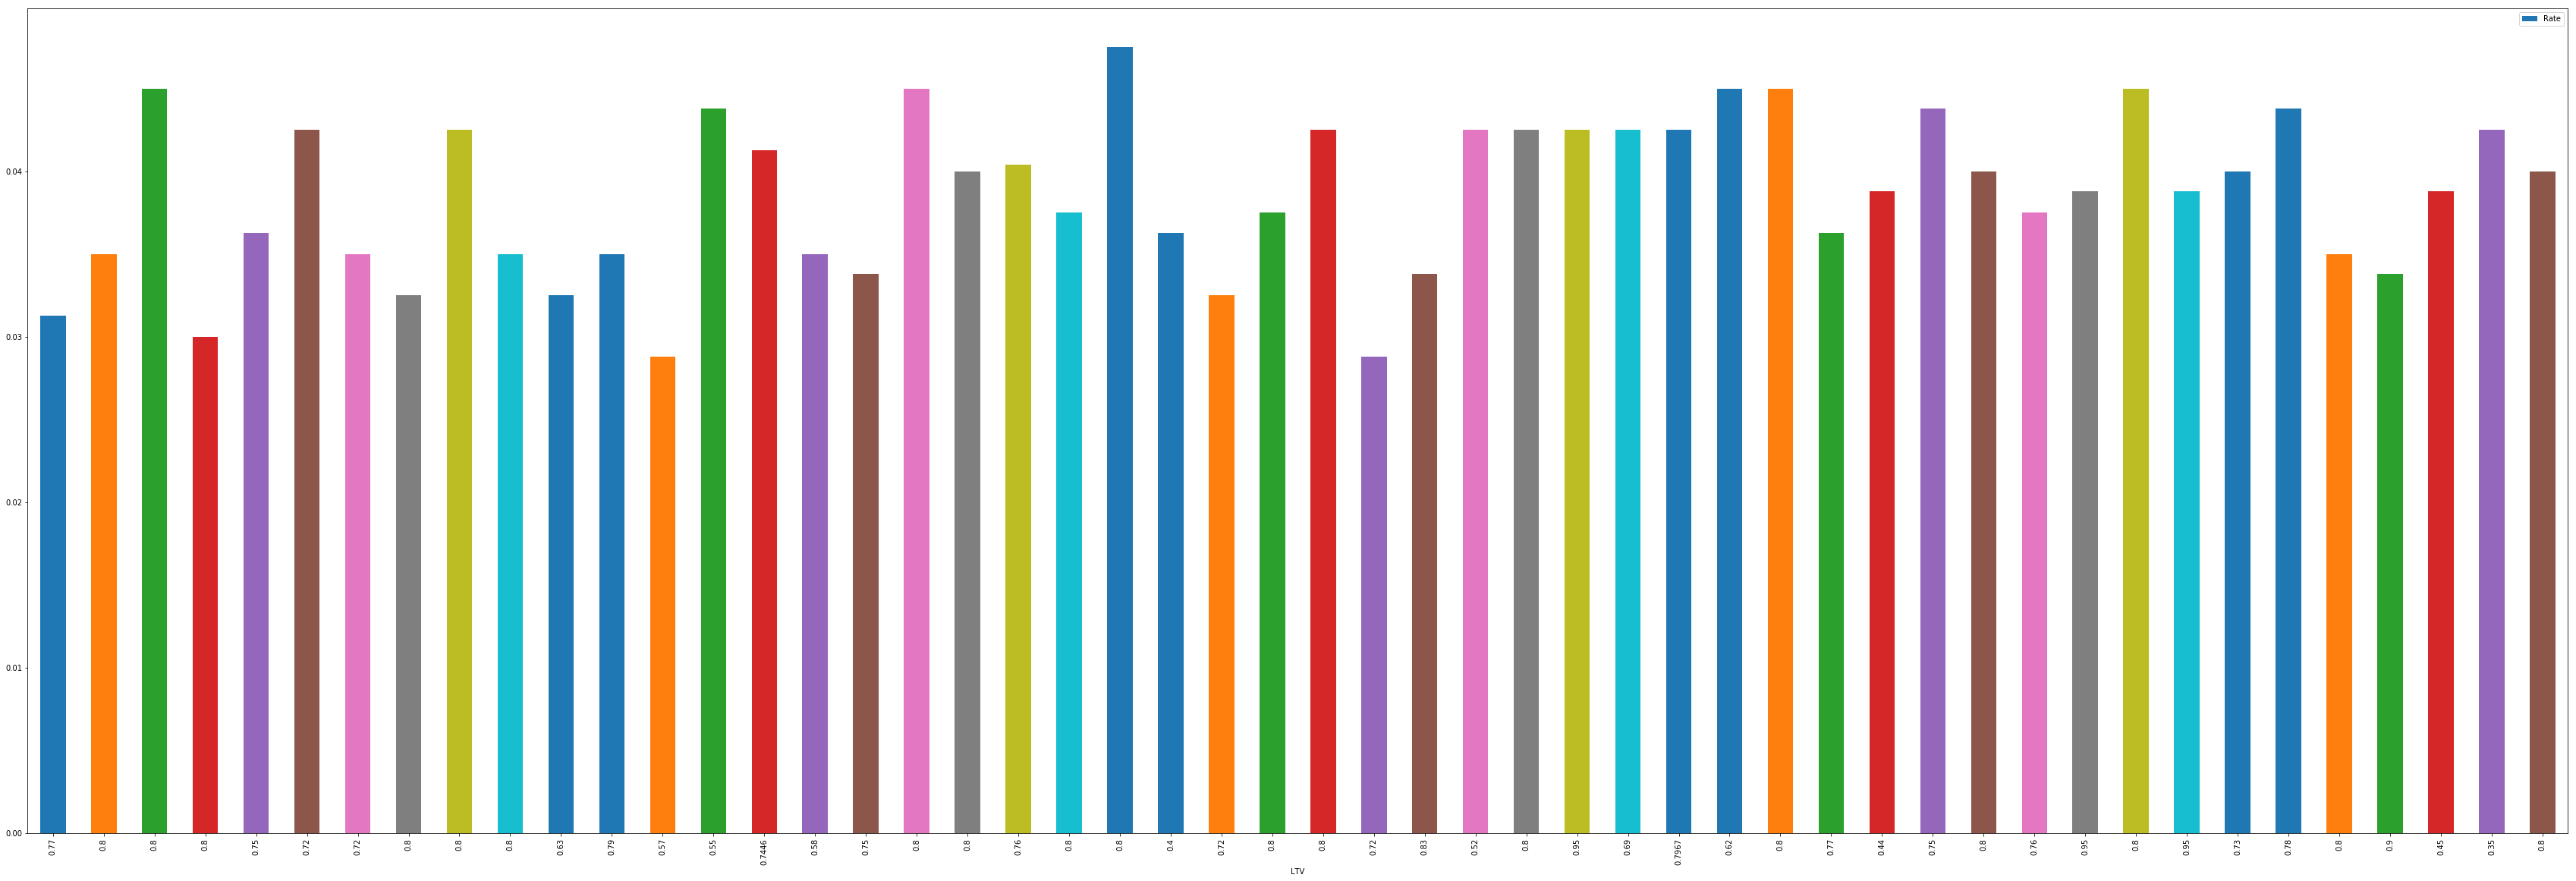

In [39]:
min_ltv_sample.plot(x="LTV", y="Rate", kind="bar", figsize=(60,20))

/Users/ujwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


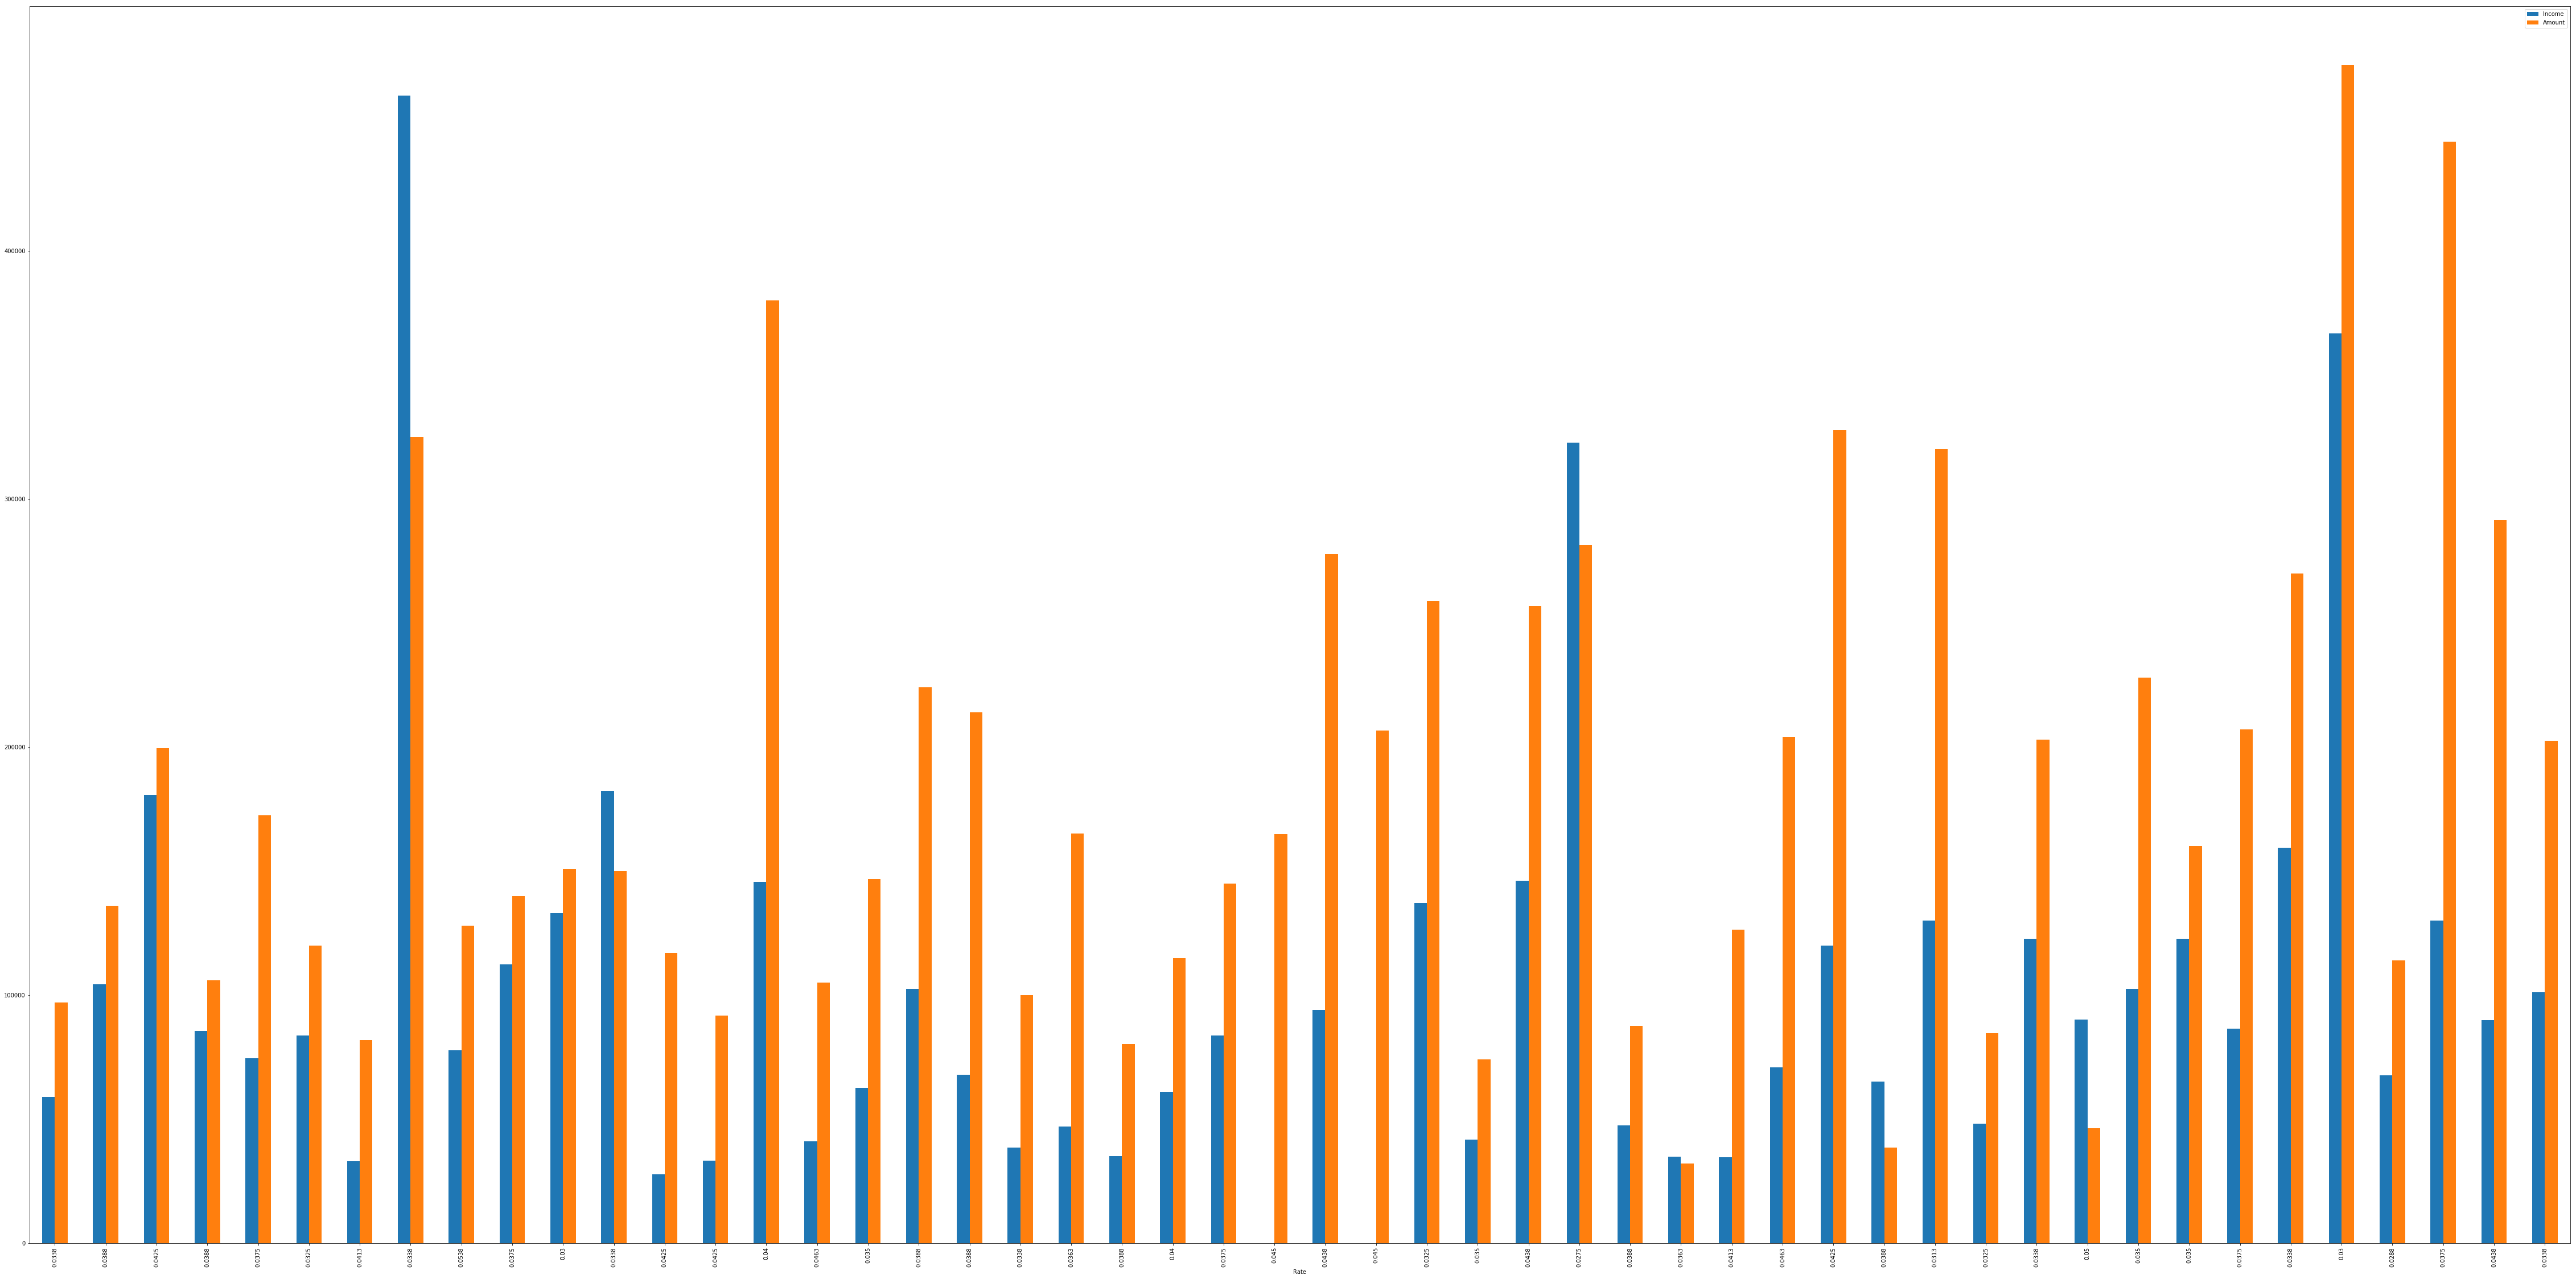

In [40]:
max_ltv_sample = max_LTV_df.sample(50)
max_ltv_sample.plot(x='Rate', y=['Income', 'Amount'], figsize=(80,40), kind = "bar")

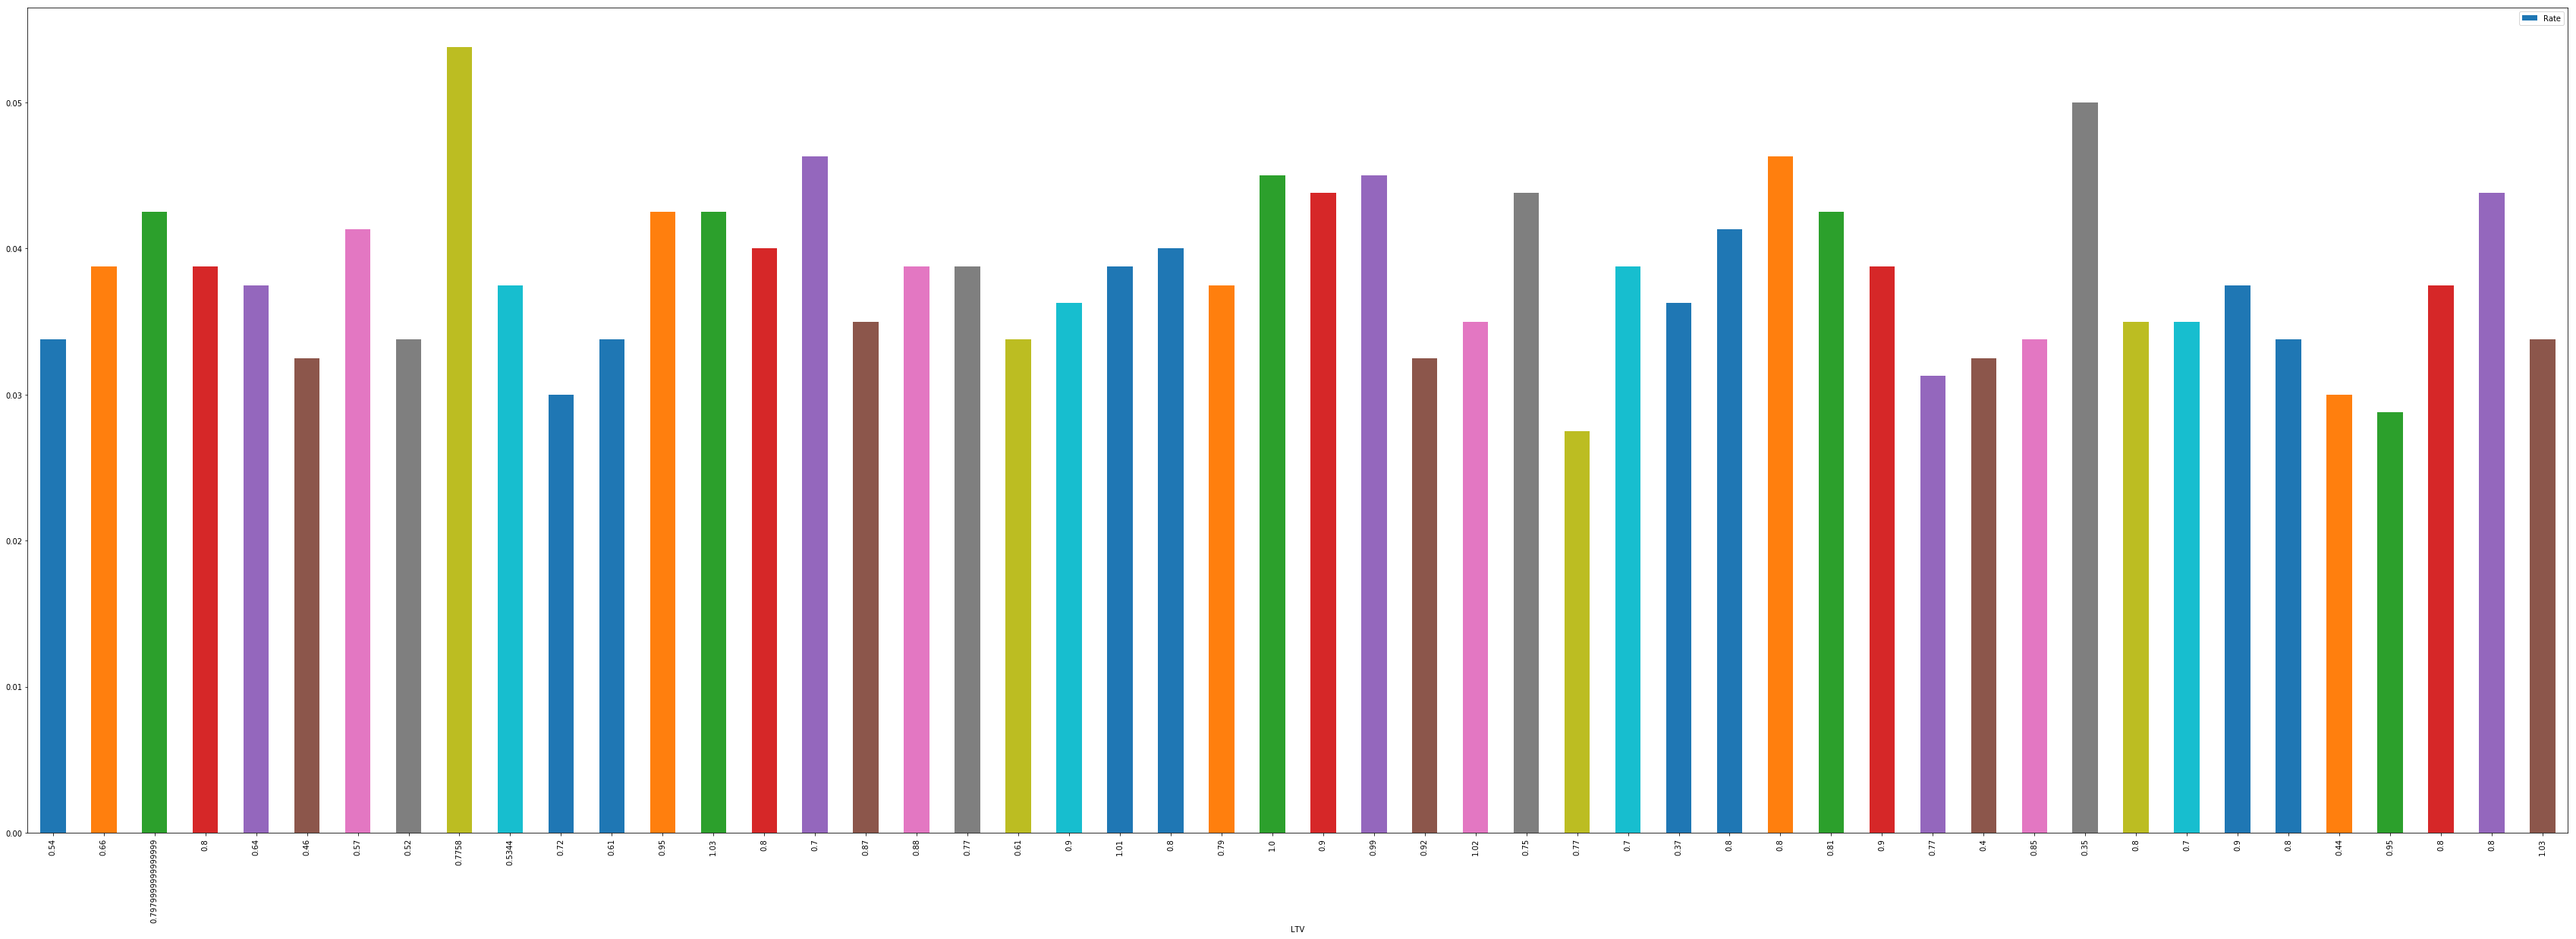

In [41]:
max_ltv_sample.plot(x="LTV", y="Rate", kind="bar", figsize=(60,20))

# No concrete evidence that proves higher LTV causes higher interest rate

Taking mean rate on max and min LTV dataFrames 

In [42]:
print("Average Interest rates for LTV")

c1 = combined_state_data[combined_state_data['LTV']<=0.78].describe()["Rate"]['mean']
c2 = combined_state_data[combined_state_data['LTV']>=0.80].describe()["Rate"]['mean']
print("1) \nAverage interest rate for Min LTV=",c1,"\n\n2)\nAverage interest rate for Max LTV =",c2)

Average Interest rates for LTV
1) 
Average interest rate for Min LTV= 0.03751630049129844 

2)
Average interest rate for Max LTV = 0.039509174981085214


Interest Rate goes high if the LTV is greater than 80%

# Taking average for entire data based on state

In [43]:
## group by state

group_test = combined_state_data.groupby(['StateName']).mean().reset_index()

In [45]:
disp4 = group_test.head(10)
display(HTML(disp4.to_html()))

,StateName,Year,FIPSStateCode,FIPSCountyCode,Income,IncRat,UPB,LTV,MortDate,Purpose,Product,Term,AmorTerm,NumBor,Occup,Rate,Amount,Front,Back,BoCreditScor
0,Alabama,2014.380952,1.0,74.746032,115880.047619,2.020331,225188.849206,0.802438,2014.321429,1.626984,1.0,315.333333,26.277778,1.452381,1.075397,0.037580,225428.634921,7.475775,10.354244,4.309524
1,Alaska,2014.080000,2.0,86.240000,137348.200000,1.704660,309048.480000,0.815600,2014.080000,1.720000,1.0,348.000000,29.000000,1.560000,1.040000,0.038176,309071.520000,1.376092,1.470168,4.280000
2,Arizona,2014.489699,4.0,14.816165,121624.755151,1.953326,229306.351030,0.744468,2014.411252,1.667987,1.0,331.827258,27.651347,1.551506,1.141838,0.038987,229538.114105,9.801770,12.670151,4.412837
3,Arkansas,2014.740385,5.0,75.474359,125284.105769,2.310196,199112.176282,0.762133,2014.721154,1.512821,1.0,310.846154,25.903846,1.512821,1.108974,0.038884,199162.246795,0.201695,0.319959,4.266026
4,California,2015.546038,6.0,53.339380,147830.157625,1.908559,440661.742512,0.660737,2015.467825,1.739090,1.0,348.832706,29.069314,1.569143,1.019168,0.039389,440993.111244,3.835400,6.090740,4.513606
5,Colorado,2013.789219,8.0,51.493208,102939.154452,1.435174,225734.569698,0.743376,2013.749676,1.617894,1.0,329.795795,27.482305,1.598771,1.040235,0.038870,225825.808082,1.438132,2.040111,4.348187
6,Connecticut,2014.123930,9.0,6.194232,116150.495719,1.297856,225105.589004,0.747456,2013.933303,1.517350,1.0,317.088779,26.424065,1.557909,1.017575,0.038823,226042.179811,0.963895,1.398369,4.347454
7,Delaware,2013.429268,10.0,3.146341,101905.809756,1.449324,223330.678049,0.796274,2013.385366,1.560976,1.0,336.000000,28.000000,1.536585,1.126829,0.038956,224212.263415,0.339692,0.444248,4.053659
8,Florida,2014.308531,12.0,68.754976,138300.712796,2.294866,232639.427962,0.771051,2014.217536,1.411848,1.0,334.270142,27.854976,1.536019,1.181043,0.039566,233002.933649,1.491556,2.814082,4.327962
9,Georgia,2015.090995,13.0,111.623697,113095.477725,1.722862,248430.477725,0.796866,2015.027488,1.530806,1.0,337.672038,28.139336,1.436019,1.018009,0.038068,248884.611374,2.290810,2.393970,4.355450


# Considering all the pre-processing, we can define range of thresholds.

IDEA:

1) Define minimum band which the application should lie under
2) Create a baseline machine learning model and train the model with respect to these range of values
3) Test the model whether it approves an application if it lies under all /most of the thresholds